# **Analysis for clusters / templates and waveforms, channels, shanks**

## This analysis script is well suited to analyse where the electrodes (silicon probes) are located that detected specific spikes.

load modules

In [1]:
%load_ext autoreload

%autoreload 2
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from spikeA.Session import *
from spikeA.Spike_train_loader import Spike_train_loader
from spikeA.Cell_group import Cell_group
from spikeA.Animal_pose import Animal_pose
from spikeA.Session import Session

set session name

In [2]:
#name="pk1330-08112021-0101"
#name="pk1330-10112021-0101"
#name="pk1330-16112021-0101"

#name="pk1330-12112021-0101"
#name="pk1331-23112021-0101"
#name="pk1331-23112021-0101_B"

#name="pk1331-24112021-0101"
#name="pk1347-24112021-0101"

#name="pk1331-29112021-0101"
#name="pk1347-01122021-0101"

#name="pk1658-06122021-0102"

#name="pk1331-29112021-0101" # HD cells
#name="pk1658-10122021-0101"

#name="pk1613-12012022-0101"
#name="pk1613-13012022-0101"

#name="pk1615-14012022-0101"

#name="pk1615-15012022-0101"
#name="pk1615-16012022-0101"
#name="pk1615-17012022-0101"
#name="pk1615-18012022-0101_A"

#name="pk1615-18012022-0103"
#name="pk1615-19012022-0105" ## remapping ! (black-white-black)
#name="pk1615-19012022-0102"

#name="pk1615-20012022-0101_B"
#name="pk3865-20012022-0101_B"

#name="pk3865-21012022-0101"

#name="pk1615-21012022-0109"  # five different environments in two different rooms
#name="pk3865-24012022-0109"  # five different environments in two different rooms
#name="pk3865-25012022-0105" # black-white-black in 55b
#name="pk3865-26012022-0101"
#name="pk3865-27012022-0109" # five env + good coverage, good MEC signal, ADN?
#name="pk3864-28012022-0101" # first trial with pk3864
#name="pk3864-29012022-0101" # 
#name="pk3864-30012022-0101" # 
#name="pk3865-31012022-0101"
#name="pk3864-31012022-0109" # first 5 OF trials for pk3864

#name="pk3865-01022022-0101"
#name="pk3865-02022022-0101"

# name="pk3864-04022022-0109" # 

# name="pk3864-05022022-0109" # 
# name="pk3864-07022022-0109" # 
# name="pk3864-09022022-0109" # 

# name="pk3864-10022022-0101"
# name="pk3864-11022022-0101"
# name="pk3864-14022022-0109"
# name="pk3864-15022022-0109"
# name="pk3864-16022022-0101"
name="pk3855-21022022-0101"

Check the path

In [3]:
import os

basedir = "/adata/electro"
subject, session = name.split("-",1)
path = basedir+"/"+subject+"/"+name+"/"

fname = name.split("_")[0]

print("Path:", path)
print("Mouse:", subject) # directory = mouse subject name
print("Session:", session)
print("Name:", name, ",", fname)
print("")
print("Path:", "OK" if os.path.isdir(path) else "invalid")

Path: /adata/electro/pk3855/pk3855-21022022-0101/
Mouse: pk3855
Session: 21022022-0101
Name: pk3855-21022022-0101 , pk3855-21022022-0101

Path: OK


## Get a Session object

Check the files

In [4]:
ses = Kilosort_session(name=fname, path=path)
ses.load_parameters_from_files(ignore_params=True)  # ignore_params if kilosort has not been executed so far
print(ses)

<class 'spikeA.Session.Kilosort_session'>
name = pk3855-21022022-0101
path = /adata/electro/pk3855/pk3855-21022022-0101
subject = pk3855
session_dat_time = 2022-02-21 01:01:00
fileBase = /adata/electro/pk3855/pk3855-21022022-0101/pk3855-21022022-0101
file_names = {'par': '/adata/electro/pk3855/pk3855-21022022-0101/pk3855-21022022-0101.par', 'desen': '/adata/electro/pk3855/pk3855-21022022-0101/pk3855-21022022-0101.desen', 'desel': '/adata/electro/pk3855/pk3855-21022022-0101/pk3855-21022022-0101.desel', 'sampling_rate': '/adata/electro/pk3855/pk3855-21022022-0101/pk3855-21022022-0101.sampling_rate_dat', 'stimulation': '/adata/electro/pk3855/pk3855-21022022-0101/pk3855-21022022-0101.stimulation', 'px_per_cm': '/adata/electro/pk3855/pk3855-21022022-0101/pk3855-21022022-0101.px_per_cm', 'setup': '/adata/electro/pk3855/pk3855-21022022-0101/pk3855-21022022-0101.setup', 'environmentFamiliarity': '/adata/electro/pk3855/pk3855-21022022-0101/pk3855-21022022-0101.environmentFamiliarity', 'params':

## Load spikes

In [5]:
stl = Spike_train_loader()
stl.load_spike_train_kilosort(ses)
print("stl.clu_ids", ",", "len =", len(stl.clu_ids))
print(stl.clu_ids)
cg = Cell_group(stl)

stl.clu_ids , len = 16
[  4   5   6   8  10  14  22  25  27  28  53  61  65  71  72 103]


In [6]:
# from tabulate import tabulate

print("Found", len(cg.neuron_list), "good clusters (neurons)")

# for i,(clu_id, spike_time) in enumerate(zip(stl.clu_ids, stl.spike_times)):
#     print("#",i,", id =",clu_id, ", spikes:",len(spike_time))
for i,n in enumerate(cg.neuron_list):
    #  n_spikes = len(n.spike_train.st)
    print("#",i,", id =",n.name, ", spikes:",n.spike_train.n_spikes(),", mean firing rate =",round(n.spike_train.mean_firing_rate(),2))

Found 16 good clusters (neurons)
# 0 , id = 4 , spikes: 18271 , mean firing rate = 14.96
# 1 , id = 5 , spikes: 19370 , mean firing rate = 15.86
# 2 , id = 6 , spikes: 15862 , mean firing rate = 12.98
# 3 , id = 8 , spikes: 18755 , mean firing rate = 15.35
# 4 , id = 10 , spikes: 21898 , mean firing rate = 17.93
# 5 , id = 14 , spikes: 10446 , mean firing rate = 8.55
# 6 , id = 22 , spikes: 10816 , mean firing rate = 8.85
# 7 , id = 25 , spikes: 15303 , mean firing rate = 12.53
# 8 , id = 27 , spikes: 22629 , mean firing rate = 18.52
# 9 , id = 28 , spikes: 6419 , mean firing rate = 5.26
# 10 , id = 53 , spikes: 6589 , mean firing rate = 5.39
# 11 , id = 61 , spikes: 16246 , mean firing rate = 13.31
# 12 , id = 65 , spikes: 37313 , mean firing rate = 30.54
# 13 , id = 71 , spikes: 18940 , mean firing rate = 15.5
# 14 , id = 72 , spikes: 27410 , mean firing rate = 22.43
# 15 , id = 103 , spikes: 14525 , mean firing rate = 11.89


## Load the waveforms

Set the waveform and channel information from the session template file.

In [7]:
cg.set_info_from_session(ses, maxchannels=5)

Templates: 116 , timepoints: 82 , Channels: 64
Loaded templates-clusters-map, spikes: 426619 , clusters: 111
Init shanks: 8


For each cluster, print the active channels where the spikes were detected, and the corresponding brain area.

In [8]:
for n in cg.neuron_list:
    print(n.name, n.channels, n.brain_area, n.cluster_decomposed) 

4 [2 0 3 1 8] ['adn'] {4: 1.0}
5 [ 3  0  1  2 11] ['adn'] {5: 1.0}
6 [4 7 2 0 5] ['adn'] {6: 1.0}
8 [5 2 0 1 4] ['adn'] {8: 1.0}
10 [6 7 4 1 0] ['adn'] {10: 1.0}
14 [7 5 2 4 1] ['adn'] {14: 1.0}
22 [15 12 13  1 10] ['adn'] {22: 1.0}
25 [20 23 21 19 17] ['adn'] {25: 1.0}
27 [22 23 20 24 21] ['adn'] {27: 1.0}
28 [23 22 18 19 20] ['adn'] {28: 1.0}
53 [40 41 45 43 42] ['mec'] {53: 1.0}
61 [42 45 43 36 44] ['mec'] {61: 1.0}
65 [42 45 38 41 29] ['adn', 'mec'] {65: 1.0}
71 [44 47 46 45 43] ['mec'] {71: 1.0}
72 [44 47 45 43 42] ['mec'] {72: 1.0}
103 [21 20 17 18 19] ['adn'] {103: 1.0}


In [9]:
unique, counts = np.unique([ '/'.join(n.brain_area) for n in cg.neuron_list ] , return_counts=True )

for u,c in zip(unique, counts):
    print(u,":",c)

adn : 11
adn/mec : 1
mec : 4


In [10]:
ses.clusterids

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  59,  60,  61,  63,  65,  66,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115], dtype=int32)

Plot the waveforms for one arbitrary cluster (neuron) on the channels of its highest peak-to-peak amplitudes of waveform.

In [11]:
#cluster = 16 # choose any cluster
cluster = stl.clu_ids[0] # select the first good cluster = int(cg.neuron_list[0].name)
channels = ses.get_channels_from_cluster(cluster, 12)
print("The most significant channels for cluster", cluster,":")
print(channels)

The most significant channels for cluster 4 :
[ 2  0  3  1  8  9 16 11  4 15 13  6]


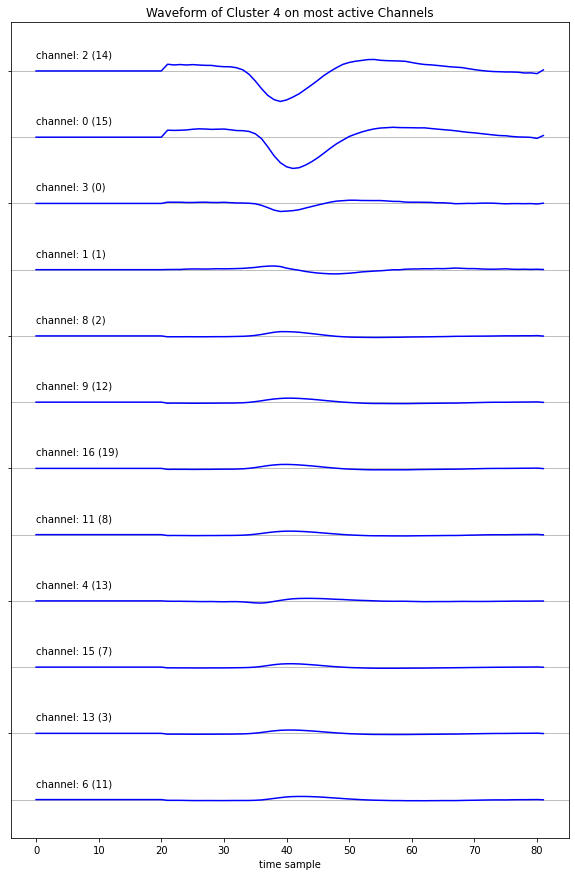

In [12]:
# plot on selected channels

plt.figure(figsize=(10,15))

for i,channel in enumerate(channels):
    
    channel_mapped, waveform = ses.get_waveform(cluster, channel) # get_waveform (of template / of cluster)
    
    plt.axhline( y = -i*.5 , color="grey" , lw=.5 )
    label = "channel: "+str(channel)+" ("+str(channel_mapped)+")"
    plt.plot( waveform -i*.5 , label=label , color="blue")
    plt.text( s= label , x=0, y=-i*.5 +.1 )
plt.xlabel("time sample")
#plt.legend()
ax = plt.gca()
ax.set(yticklabels=[])  
plt.title("Waveform of Cluster "+str(cluster)+" on most active Channels")
plt.show()

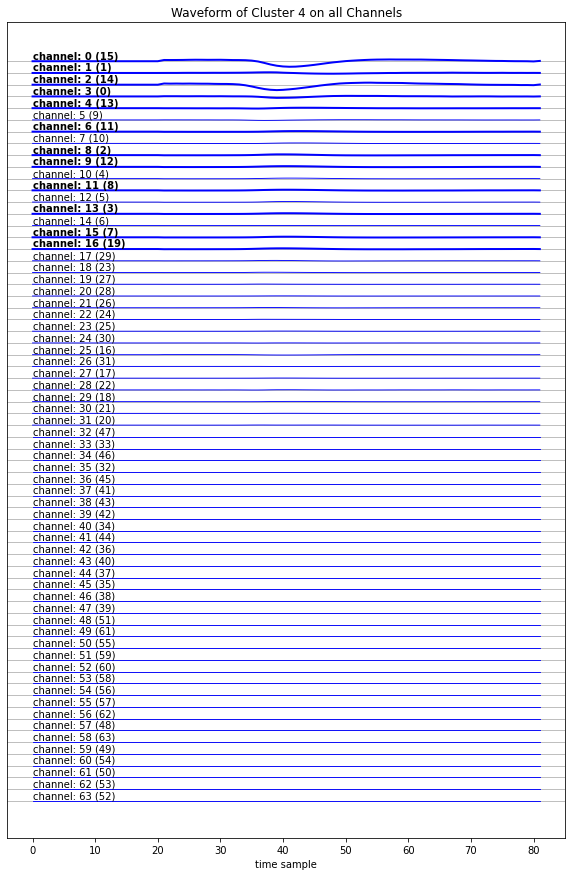

In [13]:
# plot all channels

channels_all = range(ses.wv_channels)

plt.figure(figsize=(10,15))

for i,channel in enumerate(channels_all):
    channel_mapped, waveform = ses.get_waveform(cluster, channel)
    
    plot_style = [2.,'bold'] if channel in channels else [.9, 'normal']
    
    plt.axhline( y = -i*.5 , color="grey" , lw=.5 )
    label = "channel: "+str(channel)+" ("+str(channel_mapped)+")"
    plt.plot( waveform -i*.5 , label=label , color="blue" , lw=plot_style[0])
    plt.text( s= label , x=0, y=-i*.5 +.1 , weight=plot_style[1])
plt.xlabel("time sample")
#plt.legend()
ax = plt.gca()
ax.set(yticklabels=[])  # remove the tick labels
ax.set(ylabel=None)  # remove the y-axis label
ax.tick_params(left=False)  # remove the ticks

plt.title("Waveform of Cluster "+str(cluster)+" on all Channels")
plt.show()

## Channel configuration (position and shank mapping)

In [14]:
print("electrodes:", ses.desel)

electrodes: ['adn', 'adn', 'adn', 'adn', 'mec', 'mec', 'mec', 'mec']


channel: 0  ( 15 ), position: [ 1. 65.]
channel: 1  ( 1 ), position: [ 1. 64.]
channel: 2  ( 14 ), position: [ 1. 63.]
channel: 3  ( 0 ), position: [ 1. 62.]
channel: 4  ( 13 ), position: [ 1. 61.]
channel: 5  ( 9 ), position: [ 1. 60.]
channel: 6  ( 11 ), position: [ 1. 59.]
channel: 7  ( 10 ), position: [ 1. 58.]
channel: 8  ( 2 ), position: [ 2. 57.]
channel: 9  ( 12 ), position: [ 2. 56.]
channel: 10  ( 4 ), position: [ 2. 55.]
channel: 11  ( 8 ), position: [ 2. 54.]
channel: 12  ( 5 ), position: [ 2. 53.]
channel: 13  ( 3 ), position: [ 2. 52.]
channel: 14  ( 6 ), position: [ 2. 51.]
channel: 15  ( 7 ), position: [ 2. 50.]
channel: 16  ( 19 ), position: [ 3. 49.]
channel: 17  ( 29 ), position: [ 3. 48.]
channel: 18  ( 23 ), position: [ 3. 47.]
channel: 19  ( 27 ), position: [ 3. 46.]
channel: 20  ( 28 ), position: [ 3. 45.]
channel: 21  ( 26 ), position: [ 3. 44.]
channel: 22  ( 24 ), position: [ 3. 43.]
channel: 23  ( 25 ), position: [ 3. 42.]
channel: 24  ( 30 ), position: [ 4. 

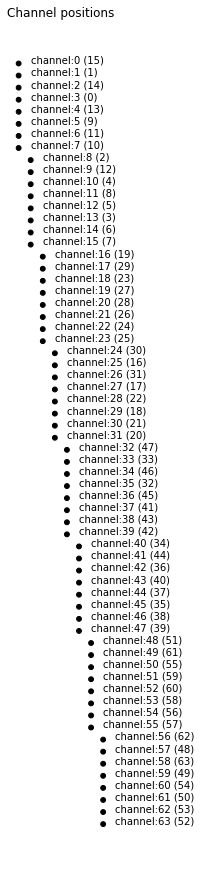

In [15]:
fig, ax = plt.subplots(figsize=(9,12), constrained_layout=True)

for channel, position in zip(range(ses.wv_channels), ses.channel_positions):
    print("channel:",channel," (",ses.channel_map[channel],"), position:",position)
        
    circle = plt.Circle((position[0], position[1]), 0.2, color="black")
    ax.add_patch(circle)
    
    plt.text(x=position[0]+1, y=position[1], s="channel:"+str(channel)+" ("+str(ses.channel_map[channel])+")")
    

ax.axis('off')
ax.axis('scaled') #this line fits your images to screen 
#ax.autoscale(enable=True)
plt.title("Channel positions")
#plt.tight_layout()
plt.show()

draw this for the specific cluster showing the significant channels

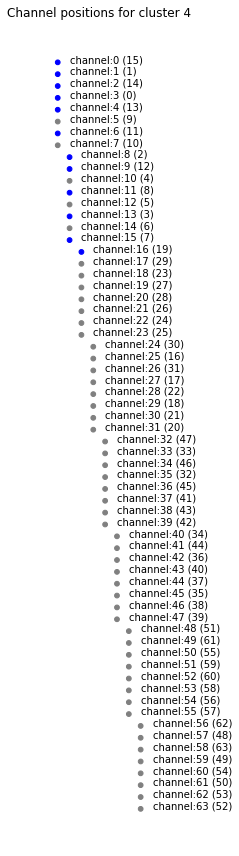

In [16]:
fig, ax = plt.subplots(figsize=(9,12))

for channel, position in zip(range(ses.wv_channels), ses.channel_positions):        
    color = 'blue' if channel in channels else 'gray'
    
    circle = plt.Circle((position[0], position[1]), 0.2, color=color)
    ax.add_patch(circle)
    
    plt.text(x=position[0]+1, y=position[1], s="channel:"+str(channel)+" ("+str(ses.channel_map[channel])+")")
    
ax.axis('off')
ax.axis('scaled') #this line fits your images to screen 
#ax.autoscale(enable=True) 
plt.title("Channel positions for cluster "+str(cluster))
plt.tight_layout()
plt.show()

Reduce this to shanks (multiple channels are on one shank), and multiple shanks are in one brain region.
One neuron shall be unambigously defined on only one brain region. 

In [17]:
print("Shanks:", ses.shanks_all)

Shanks: [1. 2. 3. 4. 5. 6. 7. 8.]


In [18]:
shanks_arr, active_shanks, electrodes = ses.get_active_shanks(channels)

In [19]:
if len(electrodes)!=1:
    print("Error, neuron was active on channels that belong to different brain regions!")

shank 1 (adn) is active
shank 2 (adn) is active
shank 3 (adn) is active
shank 4 (adn) is not detecting this neuron
shank 5 (mec) is not detecting this neuron
shank 6 (mec) is not detecting this neuron
shank 7 (mec) is not detecting this neuron
shank 8 (mec) is not detecting this neuron


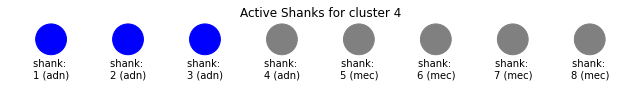

Brain region for neuron 4 is adn


In [20]:
fig, ax = plt.subplots(figsize=(9,3))

for i, (shank, active, el) in enumerate(zip(ses.shanks_all, shanks_arr, ses.desel)):
    print("shank",str(int(shank)),"("+el+")","is","active" if active else "not detecting this neuron")
    
    color = 'blue' if active else 'gray'
    
    circle = plt.Circle((i,0), 0.2, color=color)
    ax.add_patch(circle)
    
    plt.text(x=i, y=-.5, s="shank: \n"+str(int(shank))+" ("+el+")", ha='center')

ax.axis('off')
ax.axis('scaled') #this line fits your images to screen 
ax.autoscale(enable=True) 
plt.title("Active Shanks for cluster "+str(cluster))
plt.tight_layout()
plt.show()

print("Brain region for neuron",cluster,"is",electrodes[0])

### Decompose Cluster into Templates

The post-processing of phy might have changed (by split/merge) the clusters (initially equal to templates). Because we are interested in the clusters (= a neuon), we need to decompose the clusters into templates.
- [Phy spike_templates / spike_clusters](https://phy.readthedocs.io/en/latest/sorting_user_guide/#concepts)
- [Phy terminology - Clusters/Templates](https://github.com/cortex-lab/phy/blob/master/docs/terminology.md#cluster)

In [21]:
print("all clusters:", len(ses.clusterids))

all clusters: 111


In [22]:
good_clusters = [ int(n.name) for n in cg.neuron_list ]
print("good_clusters:", len(good_clusters))

good_clusters: 16


In [23]:
for c in ses.clusterids:
    print("Cluster",c)
    print("good one:",c in good_clusters)
    
    unique, weights = ses.decompose_cluster(c)
    print("decomposed template weights:",dict(zip(unique, weights)))
    if len(unique)==1:
        print("cluster is from only one template (no merge)")
        if unique[0]==c:
            print("cluster coincides with template (no split)")
        else:
            print("cluster is from split template")
    else:
        print("cluster is from merged templates")
        for t in unique:
            print("template",t)
    
    print("")

Cluster 0
good one: False
decomposed template weights: {0: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)

Cluster 1
good one: False
decomposed template weights: {1: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)

Cluster 2
good one: False
decomposed template weights: {2: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)

Cluster 3
good one: False
decomposed template weights: {3: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)

Cluster 4
good one: True
decomposed template weights: {4: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)

Cluster 5
good one: True
decomposed template weights: {5: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)

Cluster 6
good one: True
decomposed template weights: {6: 1.0}
cluster is from only 